## GRIP - The Sparks Foundation Task - 6

## Task 6 - Prediction using Decision Tree Algorithm

## Author- Priya Meharwade

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')


In [47]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Iris (2).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
df.shape

(150, 6)

In [51]:
df.columns  #columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
df.drop(['Id'],axis=1, inplace=True)   #to drop id which does not contain info

In [53]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.columns  #check new columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [55]:
df.shape   #rows and columns

(150, 5)

In [56]:
Species=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

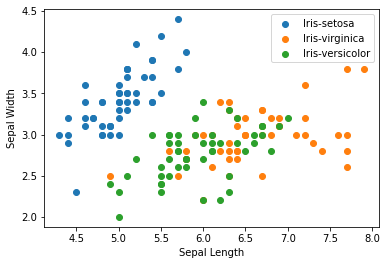

In [57]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],label=Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

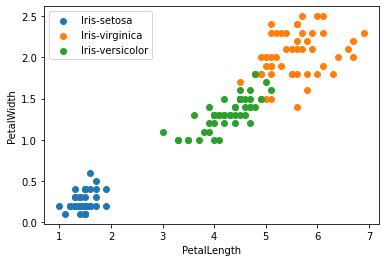

In [58]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],label=Species[i])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

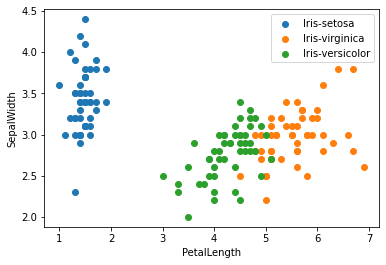

In [59]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalWidthCm'],label=Species[i])
plt.xlabel('PetalLength')
plt.ylabel('SepalWidth')
plt.legend()

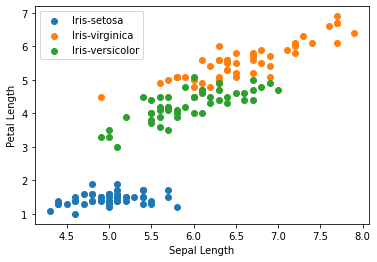

In [60]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],label=Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

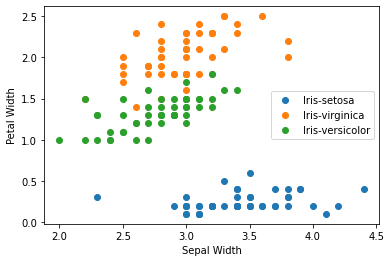

In [61]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],label=Species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

correlation matrix 

In [62]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Heatmap

<AxesSubplot:>

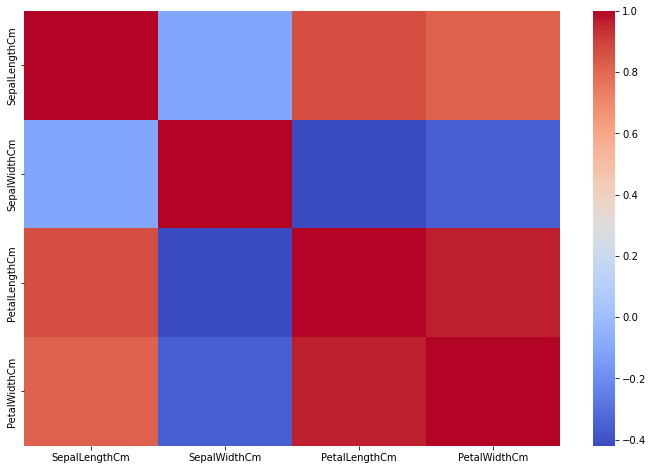

In [63]:
fig = plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr, cmap='coolwarm')

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Define the dependent and Independent Variables

In [65]:
x=df.drop(columns='Species')
y=df['Species']

In [66]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

Train and Test split

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=100)

In [69]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
9,4.9,3.1,1.5,0.1
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [70]:
y_train

6      0
25     0
21     0
92     1
9      0
      ..
87     1
103    2
67     1
24     0
8      0
Name: Species, Length: 105, dtype: int32

Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc=DecisionTreeClassifier()

In [72]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

Now we have trained our model, its time to make some predictions

In [73]:
X=[[6.4,1.8,6.69,2.1]]

In [74]:
print(dtc.predict(X))

[2]


In [75]:
y_predict=dtc.predict(x_test)
print(y_predict)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


Model Accuracy

In [76]:
print("Accuracy:", accuracy_score(y_test,y_predict)*100)

Accuracy: 95.55555555555556


In [77]:
print("Accuracy:", dtc.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


Confusion Matrix & Classification Report

In [78]:
conf_matrix=np.array(confusion_matrix(y_test,y_predict))
conf_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



[Text(0.4, 0.9, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'X[3] <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(0.2, 0.5, 'X[2] <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.3, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'X[2] <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(0.7, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

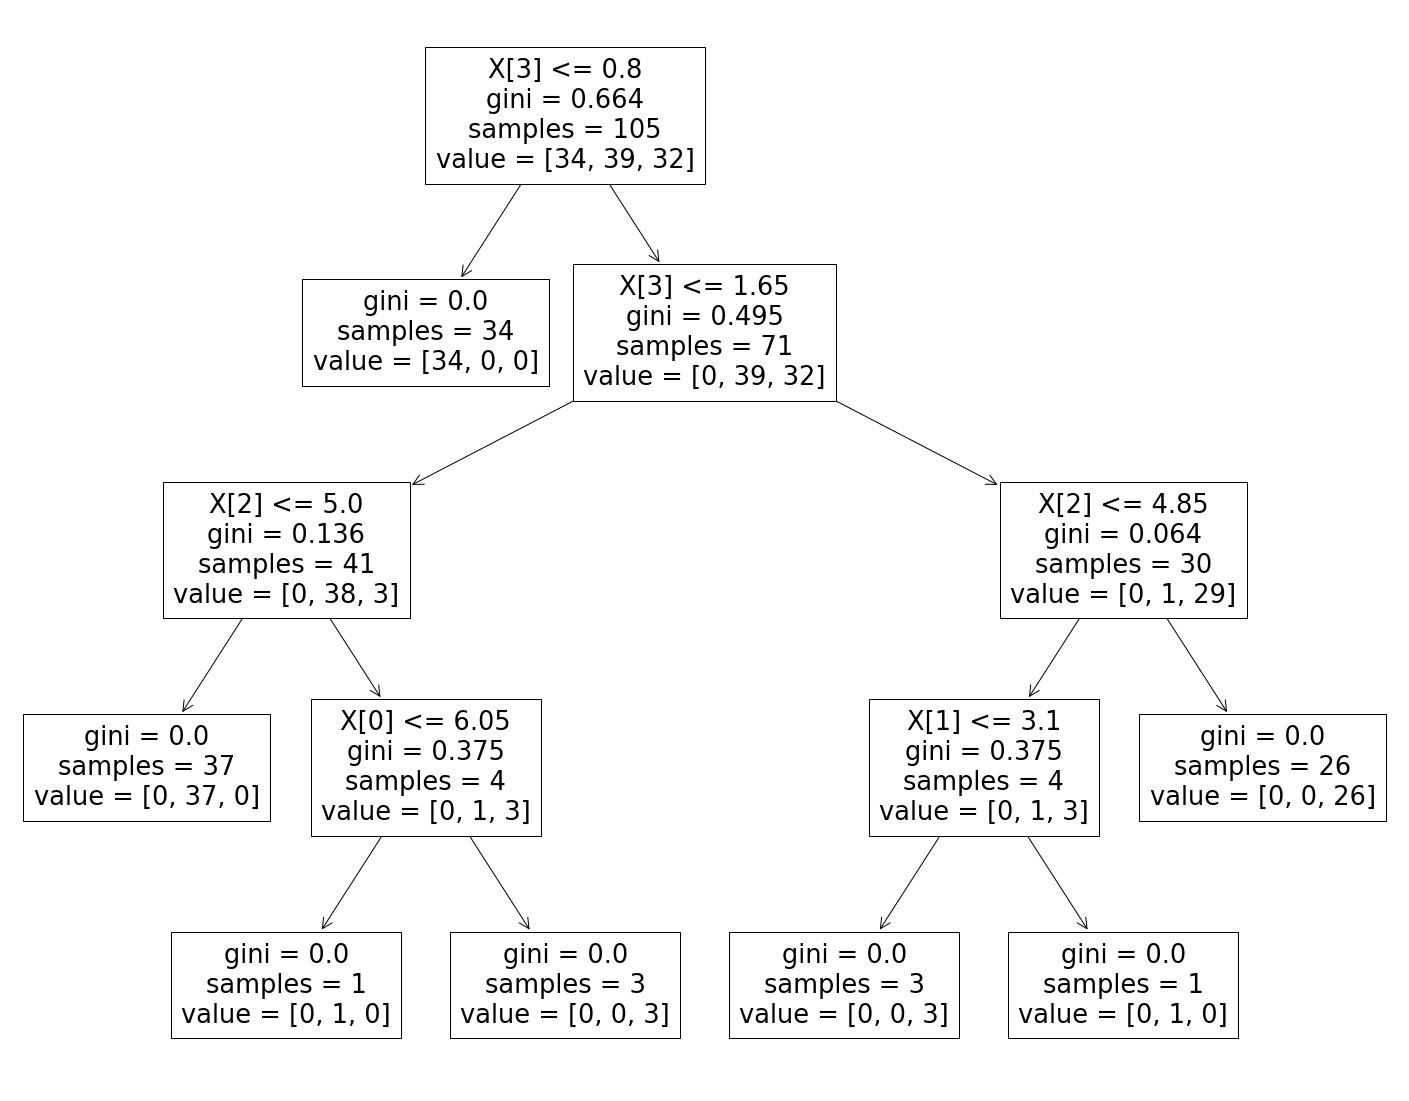

In [79]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc)